# Holonomic Robot

A **nonholonomic system** in physics and mathematics is a system whose state depends on the path taken in order to achieve it. A car is a typical example of a nonholonomic system. It can occupy any location (x,y) in any orientation ($\phi$), but the path from one location/orientation to another position/orientation is not always linear. Thus you have to parallel park.

A **holonomic system** is not constrained by this. Thus it can move anywhere at will. 

In [2]:
%matplotlib inline

In [12]:
from __future__ import division
from __future__ import print_function
import numpy as np
from numpy.linalg import norm 
from math import cos, sin, pi
import matplotlib.pyplot as plt

## Soccer

These types of robots are great for soccer, especially the goalie. Typical configuration are 3 or 4 motors. Omni wheels allow slip perpendicular to the axis.

![](pics/holonomic_robot.png)
![](pics/omni_wheel.png)

## Equvilent Motors

Since this robot has 4 motors with omni wheels, in certain configurations, you can get more power/speed in certain directions than others. Let's look at a configuration with the wheels oriented at the $\phi$ angles of: 30, 45, and 60 degrees.

![](pics/omni_robot_force_cs.png)

In [61]:
def motors(phi, angles):
    """
    in:
        phi - orientation of motors
        angles - array of angles from 0 ... 2*pi
    out:
        array of results
    """
    phi = phi*pi/180
    ans = []
    for angle in angles:
        a = np.array([
                [-sin(phi),  cos(phi), 1.0],
                [-sin(phi), -cos(phi), 1.0],
                [ sin(phi), -cos(phi), 1.0],
                [ sin(phi),  cos(phi), 1.0]
            ])
        b = np.array([
                cos(angle),
                sin(angle),
                0.0
            ])
        v = sum(abs(a.dot(b)))
        ans.append(v)
    return ans

In [59]:
theta = np.arange(0,2*pi,0.1)
em30 = motors(30, theta)
em45 = motors(45, theta)
em60 = motors(60, theta)

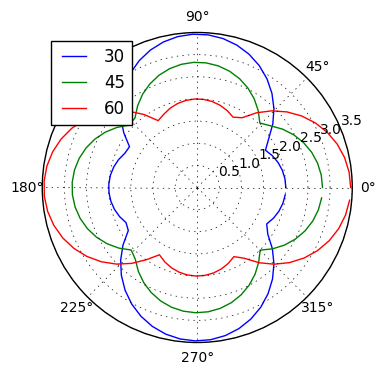

In [60]:
plt.polar(theta, em30, label='30');
plt.polar(theta, em45, label='45');
plt.polar(theta, em60, label='60');
plt.grid(True)
plt.legend(loc='upper left');

As seen above, 30 and 60 degrees orientations favor certain directions. However, 45 degrees is better in all directions and all around movement.